<font color= #28b463>

## ADCC Model Prediction

Finalize feature generation

<font color=  #3498db >
Project: Predict match-level win/loss outcome for fighter match ups at ADCC. 

In [49]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_excel('ADCC_fighter_history_FINAL.xlsx')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
display(df.head())

,Gender,Weight,Championship,Round,Fighter,Opponant,Points,Result,How,Time,...,MR_IBJJF_yr,IBJJF_belt,Num_IBJJF_medals,MR_IBJJF_place,MR_Other_yr,Other_belt,Num_Other_medals,MR_Other_place,Birthdate,Belt_date
0,Male,Men -66kg,Championship,Semi-Finals,Paulo Miyao,"Augusto ""Tanquinho"" Mendes",0,l,ref decision,15:00,...,2019.0,black,6.0,1.0,2019.0,black,6.0,1.0,1991-05-11 00:00:00,2013-06-01
1,Male,Men -77kg,Consolation,Consolation,Garry Tonon,Dante Leon,0,w,submission,5:22,...,2014.0,black,1.0,3.0,2016.0,black,4.0,1.0,1991-09-12 00:00:00,2013-09-01
2,Male,Men -88kg,Consolation,Consolation,Josh Hinger,Jon Blank,3,w,score,10:00,...,2018.0,black,4.0,1.0,2017.0,black,9.0,1.0,1982-05-28 00:00:00,2013-12-01
3,Male,Men -99kg,Consolation,Consolation,"Lucas ""Hulk"" Barbosa",Vinny Magalhaes,0,w,forfeit,0:00,...,2019.0,black,9.0,1.0,2017.0,black,1.0,1.0,1992-02-13 00:00:00,2015-07-01
4,Male,Men +99kg,Consolation,Consolation,Marcus Buchecha Almeida,"Roberto ""Cyborg"" Abreu",0,w,forfeit,0:00,...,2012.0,black,6.0,1.0,2016.0,black,7.0,1.0,1990-01-08 00:00:00,2010-06-01


In [3]:
df.shape

(226, 61)

In [4]:
print("Total Row Number: {0} \nTotal Col Number: {1}".format(df.shape[0], df.shape[1]))

Total Row Number: 226 
Total Col Number: 61


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 61 columns):
Gender                  226 non-null object
Weight                  226 non-null object
Championship            226 non-null object
Round                   226 non-null object
Fighter                 226 non-null object
Opponant                226 non-null object
Points                  226 non-null int64
Result                  226 non-null object
How                     226 non-null object
Time                    226 non-null object
Day                     226 non-null object
Match No                226 non-null int64
Place                   226 non-null object
Entrance                221 non-null object
Gym                     226 non-null object
Belt                    224 non-null object
Medal_ADCC              79 non-null object
ADCC_place              79 non-null object
ADCC_Year               80 non-null object
ADCC_years_competed     224 non-null object
Num_ADCC_comp       

In [6]:
nullvalues = df.loc[:, df.isnull().any()].isnull().sum().sort_values(ascending=False)
nullvalues

Highest_ADCC_place      165
Max_ADCC_medals         165
ADCC_place              147
Medal_ADCC              147
ADCC_Year               146
Trails_place            138
Highest_Trials_place    138
Max_tr_medals           138
Trails_winner           133
Trials_Year             132
MR_tr_Medal_yr          132
MR_IBJJF_W_yr            94
Num_IBJJF_W_medals       94
MR_IBJJF_W_place         94
IBJJF_W_belt             93
IBJJF_world              92
Other_tours              75
MR_Other_yr              75
Other_belt               75
Num_Other_medals         75
MR_Other_place           75
IBJJF_majors             49
MR_IBJJF_yr              49
Num_IBJJF_medals         49
MR_IBJJF_place           49
IBJJF_belt               48
Belt_date                32
Birthdate                12
Entrance                  5
ADCC_years_competed       2
Num_ADCC_comp             2
MR_ADCC_Medal_yr          2
Belt                      2
dtype: int64

In [4]:
import datetime
from datetime import time
# df['Time'] = pd.to_datetime(df['Time'], format= '%M:%S')
df['Birthdate_DT'] = pd.to_datetime(df['Birthdate'])
df['Belt_date_DT'] = pd.to_datetime(df['Belt_date'])

In [5]:
df['Birthdate_DT'].dtype

dtype('<M8[ns]')

In [6]:
datetime.datetime.now()

datetime.datetime(2019, 12, 10, 9, 2, 50, 581145)

In [7]:
import numpy as np
df['age_float'] = (datetime.datetime.now() - df['Birthdate_DT'])/np.timedelta64(1, 'Y')
df['blackbelt_float'] = (datetime.datetime.now() - df['Belt_date_DT'])/np.timedelta64(1, 'Y')

In [8]:
df.age_float.isnull().sum()

12

In [9]:
#fill in birthdate NaNs with the median age
df['age_float'].fillna((df['age_float'].median()), inplace=True)

In [10]:
df.age_float.isnull().sum()

0

In [11]:
df.blackbelt_float.isnull().sum()

32

In [12]:
#fill missing black belt dates with 0 since the fighters aren't bb yet
df['blackbelt_float'].fillna(value=0, inplace=True)

In [13]:
df.blackbelt_float.isnull().sum()

0

<font color=  #3498db >

#### Target Column

In [17]:
df.Results.value_counts() #result is win/loss,  binary classification

Loss    113
Win     113
Name: Results, dtype: int64

In [18]:
df.Results.isnull().sum()

0

In [19]:
pd.unique(df.Results)

array(['Loss', 'Win'], dtype=object)

In [20]:
df.groupby('Results')['Fighter'].count()

Results
Loss    113
Win     113
Name: Fighter, dtype: int64

<font color=  #3498db >

Second Target

In [21]:
df.How.value_counts() #how match was won - 4 categories, multiclass classification

score           108
submission       70
ref decision     42
forfeit           6
Name: How, dtype: int64

In [22]:
df.How.isnull().sum()

0

In [23]:
pd.unique(df.How)

array(['ref decision', 'submission', 'score', 'forfeit'], dtype=object)

In [24]:
df.groupby('How')['Fighter'].count()

How
forfeit           6
ref decision     42
score           108
submission       70
Name: Fighter, dtype: int64

<font color= #28b463>

## Model Prediction

In [25]:
df.head(3)

,Gender,Weight,Championship,Round,Fighter,Opponant,Points,Result,How,Time,...,Num_IBJJF_medals,MR_IBJJF_place,MR_Other_yr,Other_belt,Num_Other_medals,MR_Other_place,Birthdate,Belt_date,Birthdate_DT,Belt_date_DT
0,Male,Men -66kg,Championship,Semi-Finals,Paulo Miyao,"Augusto ""Tanquinho"" Mendes",0,l,ref decision,15:00,...,6.0,1.0,2019.0,black,6.0,1.0,1991-05-11 00:00:00,2013-06-01,1991-05-11,2013-06-01
1,Male,Men -77kg,Consolation,Consolation,Garry Tonon,Dante Leon,0,w,submission,5:22,...,1.0,3.0,2016.0,black,4.0,1.0,1991-09-12 00:00:00,2013-09-01,1991-09-12,2013-09-01
2,Male,Men -88kg,Consolation,Consolation,Josh Hinger,Jon Blank,3,w,score,10:00,...,4.0,1.0,2017.0,black,9.0,1.0,1982-05-28 00:00:00,2013-12-01,1982-05-28,2013-12-01


In [26]:
df.columns

Index(['Gender', 'Weight', 'Championship', 'Round', 'Fighter', 'Opponant',
       'Points', 'Result', 'How', 'Time', 'Day', 'Match No', 'Place',
       'Entrance', 'Gym', 'Belt', 'Medal_ADCC', 'ADCC_place', 'ADCC_Year',
       'ADCC_years_competed', 'Num_ADCC_comp', 'Trails_winner', 'Trials_Year',
       'Trails_place', 'Highest_ADCC_place', 'Max_ADCC_medals',
       'MR_ADCC_Medal_yr', 'Highest_Trials_place', 'Max_tr_medals',
       'MR_tr_Medal_yr', 'age_float', 'blackbelt_float', 'Results', 'RoundNo',
       'Min', 'Sec', 'Seconds', 'KGWeight', 'How_weighted', 'How_weighted_2',
       'Result_score', 'Final_WL_Score', 'Place_score', 'Place_num',
       'IBJJF_world', 'IBJJF_majors', 'Other_tours', 'MR_IBJJF_W_yr',
       'IBJJF_W_belt', 'Num_IBJJF_W_medals', 'MR_IBJJF_W_place', 'MR_IBJJF_yr',
       'IBJJF_belt', 'Num_IBJJF_medals', 'MR_IBJJF_place', 'MR_Other_yr',
       'Other_belt', 'Num_Other_medals', 'MR_Other_place', 'Birthdate',
       'Belt_date', 'Birthdate_DT', 'Belt_date_

Original data from the ADCC tournament contained multiple features for how the matches concluded. For the prediction model, I dropped all match outcome data that would lead to target data leakage. We will keep only fighter history, ADCC entrance info, and results and how the match concluded (two targets) for the prediction.

In [14]:
df1 = df[['Results', #'How', #target
          'Gender','Weight','Fighter','Opponant','Entrance','Gym', #match entrace data
          'Belt','age_float','blackbelt_float', #fighter info
          'Num_ADCC_comp','Highest_ADCC_place','Max_ADCC_medals','MR_ADCC_Medal_yr','Highest_Trials_place',
          'Max_tr_medals','MR_tr_Medal_yr',
          #'IBJJF_world', 'IBJJF_majors','Other_tours', 
          'MR_IBJJF_W_yr', 'IBJJF_W_belt', 'Num_IBJJF_W_medals','MR_IBJJF_W_place', 'MR_IBJJF_yr', 'IBJJF_belt', 
          'Num_IBJJF_medals','MR_IBJJF_place', 'MR_Other_yr', 'Other_belt', 'Num_Other_medals','MR_Other_place'
         ]]

In [79]:
df1.shape

(226, 28)

In [15]:
#we fill missing values with a zero because if the fighters do not have a medal in past tournaments, they get a score of zero
df1.fillna(0, inplace=True)

In [16]:
df1.Num_ADCC_comp= df1.Num_ADCC_comp.astype(int)
df1.Highest_ADCC_place= df1.Highest_ADCC_place.astype(int)
df1.Max_ADCC_medals= df1.Max_ADCC_medals.astype(int)
df1.MR_ADCC_Medal_yr= df1.MR_ADCC_Medal_yr.astype(int)
df1.Highest_Trials_place= df1.Highest_Trials_place.astype(int)
df1.Max_tr_medals= df1.Max_tr_medals.astype(int)
df1.MR_tr_Medal_yr= df1.MR_tr_Medal_yr.astype(int)

df1.MR_IBJJF_W_yr= df1.MR_IBJJF_W_yr.astype(int)
df1.Num_IBJJF_W_medals= df1.Num_IBJJF_W_medals.astype(int)
df1.MR_IBJJF_W_place= df1.MR_IBJJF_W_place.astype(int)

df1.MR_IBJJF_yr= df1.MR_IBJJF_yr.astype(int)
df1.Num_IBJJF_medals= df1.Num_IBJJF_medals.astype(int)
df1.MR_IBJJF_place= df1.MR_IBJJF_place.astype(int)
df1.MR_Other_yr= df1.MR_Other_yr.astype(int)
df1.Num_Other_medals= df1.Num_Other_medals.astype(int)
df1.MR_Other_place= df1.MR_Other_place.astype(int)

df1.age_float= df1.age_float.astype(int)
df1.blackbelt_float= df1.blackbelt_float.astype(int)

In [17]:
df1.Gym= df1.Gym.astype(str)
df1.Belt= df1.Belt.astype(str)
df1.Entrance= df1.Entrance.astype(str)
df1.IBJJF_W_belt= df1.IBJJF_W_belt.astype(str)
df1.IBJJF_belt= df1.IBJJF_belt.astype(str)
df1.Other_belt= df1.Other_belt.astype(str)

<font color=  #3498db >

#### One Hot Encoding

In [18]:
#label encode the target column
from sklearn.preprocessing import LabelEncoder

target = ['Results']

encoder = LabelEncoder()

# Apply the label encoder to each column
encoded = df1[target].apply(encoder.fit_transform)
encoded.head(3)

,Results
0,0
1,1
2,1


In [19]:
# segment categorical features

cat_features = ['Gender','Weight','Fighter','Opponant',
       'Entrance','Gym','Belt','IBJJF_W_belt', 'IBJJF_belt','Other_belt',
               ]

In [20]:
#ohe with pandas get_dummies for categorical features, drop the target
df1.drop(columns=['Results'], inplace=True)
data = pd.get_dummies(df1,prefix_sep="__",
                              columns=cat_features)

In [21]:
data.head()

,age_float,blackbelt_float,Num_ADCC_comp,Highest_ADCC_place,Max_ADCC_medals,MR_ADCC_Medal_yr,Highest_Trials_place,Max_tr_medals,MR_tr_Medal_yr,MR_IBJJF_W_yr,...,IBJJF_W_belt__brown,IBJJF_W_belt__purple,IBJJF_belt__0,IBJJF_belt__black,IBJJF_belt__brown,IBJJF_belt__purple,Other_belt__0,Other_belt__black,Other_belt__brown,Other_belt__purple
0,28,6,1,3,1,2019,0,0,0,2019,...,0,0,0,1,0,0,0,1,0,0
1,28,6,4,0,0,2019,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,37,6,1,0,0,2019,1,1,2019,0,...,0,0,0,1,0,0,0,1,0,0
3,27,4,1,0,0,2019,0,0,0,2018,...,0,0,0,1,0,0,0,1,0,0
4,29,9,3,1,4,2017,0,0,0,2019,...,0,0,0,1,0,0,0,1,0,0


In [21]:
data.columns

Index(['age_float', 'blackbelt_float', 'Num_ADCC_comp', 'Highest_ADCC_place',
       'Max_ADCC_medals', 'MR_ADCC_Medal_yr', 'Highest_Trials_place',
       'Max_tr_medals', 'MR_tr_Medal_yr', 'MR_IBJJF_W_yr',
       ...
       'IBJJF_W_belt__brown', 'IBJJF_W_belt__purple', 'IBJJF_belt__0',
       'IBJJF_belt__black', 'IBJJF_belt__brown', 'IBJJF_belt__purple',
       'Other_belt__0', 'Other_belt__black', 'Other_belt__brown',
       'Other_belt__purple'],
      dtype='object', length=296)

In [22]:
data.fillna(0, inplace=True)

In [23]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()

# #encode all column features into array
# for col in df1.columns:
#     df1[col]=le.fit_transform(df1[col])  

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(data))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [ ]:
print(scaler.mean_)

In [25]:
print(scaler.transform(data))

[[ 0.03265331  0.31041175 -0.67379752 ...  0.74023321 -0.1159867
  -0.09449112]
 [ 0.03265331  0.31041175  1.51201453 ...  0.74023321 -0.1159867
  -0.09449112]
 [ 1.87756512  0.31041175 -0.67379752 ...  0.74023321 -0.1159867
  -0.09449112]
 ...
 [-0.7873075  -0.86271627 -0.67379752 ...  0.74023321 -0.1159867
  -0.09449112]
 [ 0.44263371  0.07578615 -0.67379752 ...  0.74023321 -0.1159867
  -0.09449112]
 [ 0.03265331 -1.09734187 -1.40240154 ... -1.35092561 -0.1159867
  -0.09449112]]


In [26]:
y = encoded #data['Results']
X = data

In [27]:
display(X.shape)
display(y.shape)

(226, 296)

(226, 1)

In [28]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=109)

In [29]:
print('Training X_train Shape:', X_train.shape)
print('Training y_train Shape:', y_train.shape)
print('Testing X_test Shape:', X_test.shape)
print('Testing y_test Shape:', y_test.shape)

Training X_train Shape: (169, 296)
Training y_train Shape: (169, 1)
Testing X_test Shape: (57, 296)
Testing y_test Shape: (57, 1)


<font color= #28b463>
    
### Target 1: Results (Win/Loss)

<font color=  #3498db >

#### K Nearest Neighbors

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [57]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.56


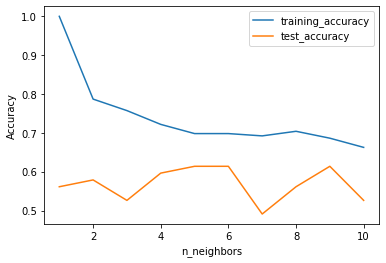

In [34]:
import matplotlib.pyplot as plt

training_accuracy = []
test_accuracy = []
neighbors_settings = range (1,11)

for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label='training_accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test_accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<font color= #28b463>
Best neighbors is 5 to 6 to avoid over and underfitting. The model's performance is 61% using KNN. However, with one-hot encoding, the dataset is has 296 features and a handful have 0 most of the time (sparse dataset). We use the KNN accuracy as the baseline, but continue to compare models below.

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.61


<font color=  #3498db >

#### Random Forest

In [127]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)

clf.fit(X_train, y_train)

predicted= clf.predict(X_test) 

In [128]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, predicted))

Accuracy: 0.543859649122807


In [129]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.54      0.46      0.50        28
           1       0.55      0.62      0.58        29

    accuracy                           0.54        57
   macro avg       0.54      0.54      0.54        57
weighted avg       0.54      0.54      0.54        57



In [130]:
#cross validating 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred_cv = cross_val_predict(clf, X_test, y_test, cv=5)

confusion_matrix(y_pred_cv, y_test)

array([[14, 13],
       [14, 16]], dtype=int64)

In [131]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(clf, X_train, y_train, cv = 30)
print(cv_score)
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_score.mean(), cv_score.std() * 2))

[0.66666667 0.83333333 0.5        0.5        0.66666667 0.66666667
 0.5        0.33333333 0.33333333 0.5        0.5        0.83333333
 0.5        0.33333333 0.66666667 0.66666667 0.5        0.5
 0.5        1.         0.5        0.5        0.66666667 0.66666667
 0.4        0.5        0.5        0.75       0.5        0.        ]
Accuracy: 0.55 (+/- 0.36)


In [132]:
#Let's test the entire dataset again.
scores = cross_val_score(clf, X, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.51 (+/- 0.27)


<font color=  #3498db >

#### Logistic Regression

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=109) 
# 75% training and 25% test

print('Training X_train Shape:', X_train.shape)
print('Training y_train Shape:', y_train.shape)
print('Testing X_test Shape:', X_test.shape)
print('Testing y_test Shape:', y_test.shape)

Training X_train Shape: (169, 296)
Training y_train Shape: (169, 1)
Testing X_test Shape: (57, 296)
Testing y_test Shape: (57, 1)


In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict =lr.predict(X_test)

lr_predict_prob = lr.predict_proba(X_test)

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_accuracy = accuracy_score(y_test, lr_predict)
print(lr_conf_matrix)
print(lr_accuracy)

[[15 13]
 [10 19]]
0.5964912280701754


In [38]:
from sklearn import metrics
print(metrics.classification_report(y_test, lr_predict))

              precision    recall  f1-score   support

           0       0.60      0.54      0.57        28
           1       0.59      0.66      0.62        29

    accuracy                           0.60        57
   macro avg       0.60      0.60      0.59        57
weighted avg       0.60      0.60      0.59        57



In [39]:
#cross validation 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred_cv = cross_val_predict(lr, X_test, y_test, cv=5)

confusion_matrix(y_pred_cv, y_test)

array([[15, 13],
       [13, 16]], dtype=int64)

In [40]:
#cross validation score
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(lr, X_train, y_train, cv = 30)
print(cv_score)
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_score.mean(), cv_score.std() * 2))

[0.66666667 0.66666667 0.66666667 0.5        0.66666667 0.66666667
 0.5        0.33333333 0.5        0.66666667 0.5        0.5
 0.5        0.33333333 0.66666667 0.83333333 0.5        0.66666667
 0.5        0.83333333 0.33333333 0.66666667 0.66666667 0.66666667
 0.4        0.75       0.5        1.         0.75       0.        ]
Accuracy: 0.58 (+/- 0.37)


In [41]:
# accuracy on entire dataset
scores = cross_val_score(lr, X, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.50 (+/- 0.20)


In [42]:
# accuracy, precision, recall, and f1 scoring for LR
from sklearn import metrics
print(metrics.accuracy_score(y_test, lr_predict))
print(metrics.precision_score(y_test, lr_predict))
print(metrics.recall_score(y_test, lr_predict))
print(metrics.f1_score(y_test, lr_predict))

0.5964912280701754
0.59375
0.6551724137931034
0.6229508196721311


- Precision: tp / (tp + fp) - The number of correct positive results divided by the number of all positive results returned by the classifier. 
- Recall: tp / (tp + fn) - The number of correct positive results divided by the number of all samples that should have been identified as positive.
- The F1 score is the harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. 

<font color=  #3498db >
Compare to LinearSVC

In [43]:
# compare logistic regression to linear support vector machine classifiers
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_train, y_train)
print("Training Accuracy Score: {:.2f}".format(clf.score(X_train, y_train)))
print("Testing Accuracy Score: {:.2f}".format(clf.score(X_test, y_test)))

Training Accuracy Score: 0.60
Testing Accuracy Score: 0.63


<font color=  #3498db >
Cross Validation for Logistic Regression

In [59]:
# try k-fold cross-validator
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kfold = KFold(n_splits=3, random_state=7)

result = cross_val_score(lr, X, y, cv=kfold, scoring='accuracy')
print(result.mean())

0.5666666666666667


In [60]:
from sklearn.model_selection import GridSearchCV

dual=[True,False]
max_iter=[100,110,120,130,140]
C = [0.1,1.0,1.5,2.0,4,5,10]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)

In [64]:
import time

lr = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()
grid_result = grid.fit(X, y)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.592920 using {'C': 1.5, 'dual': True, 'max_iter': 110}
Execution time: 6.007554531097412 ms


In [62]:
from sklearn.model_selection import RandomizedSearchCV

# lr = LogisticRegression(penalty='l2')
random = RandomizedSearchCV(estimator=lr, param_distributions=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()
random_result = random.fit(X, y)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.584071 using {'max_iter': 110, 'dual': True, 'C': 10}
Execution time: 0.29690980911254883 ms


<font color= #28b463>
The above two cross validation searches aren't stable and continue to produce different accuracy scores. I switch to only searching for the regularization penalty and regularization hyperparameter C. 

In [77]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2',C=5)
lr.fit(X_train, y_train)

print("Training Accuracy Score: {:.2f}".format(lr.score(X_train, y_train)))
print("Testing Accuracy Score: {:.2f}".format(lr.score(X_test, y_test)))

Training Accuracy Score: 0.99
Testing Accuracy Score: 0.65


In [65]:
from sklearn.model_selection import GridSearchCV
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = [0.1,1.0,1.5,2.0,4,5,10]

hyperparameters = dict(C=C, penalty=penalty)

In [67]:
grid_2 = GridSearchCV(lr, hyperparameters, cv=3, verbose=0)
best_model = grid_2.fit(X, y)
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 0.1


<font color= #28b463>
    
#### Final Model Selection - Logistic Regression with a l1 penalty and 0.1 C regularlization hyperparameter.

In [78]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train, y_train)

print("Training Accuracy Score: {:.2f}".format(lr.score(X_train, y_train)))
print("Testing Accuracy Score: {:.2f}".format(lr.score(X_test, y_test)))

Training Accuracy Score: 0.66
Testing Accuracy Score: 0.70


<font color=  #3498db >
Feature Coefficients for Logistic Regression

In [53]:
cols = list(data)
# list(df)
# my_dataframe.columns.values.tolist()
# my_dataframe.columns.tolist()

In [54]:
lr.coef_

array([[-1.66191013e-01,  8.95827603e-02,  4.18353819e-01,
         3.81597149e-01, -3.05797077e-01,  1.25417677e-04,
         8.59844316e-01,  1.26131633e-01, -1.21329220e-03,
         5.84034423e-04, -1.04561220e-01, -4.59490140e-01,
         1.86145582e-03, -1.38578913e-01, -2.58370580e-01,
         8.20695383e-04, -1.84097746e-03, -7.12963389e-01,
         6.38540300e-03,  4.35933747e-01, -2.87768680e-01,
         2.26877565e-01, -7.31374977e-02, -5.51944718e-01,
         6.92596719e-01, -3.26910279e-02,  4.62001387e-01,
        -1.37874720e-01,  1.44260123e-01,  7.08215626e-01,
         8.11473173e-01, -6.73554713e-01,  0.00000000e+00,
        -7.22140616e-02,  8.38999796e-01, -3.81745767e-01,
         4.08815749e-01, -5.95867292e-01, -1.56833516e-01,
         0.00000000e+00,  7.03846388e-01,  0.00000000e+00,
         5.71235688e-01, -3.91402380e-01,  5.17298289e-01,
         7.83318437e-01, -6.62607382e-02, -1.01245006e-01,
         1.94386681e-01, -8.47453354e-01, -1.76593786e-0

In [ ]:
np.array([cols[1:-1]]).T

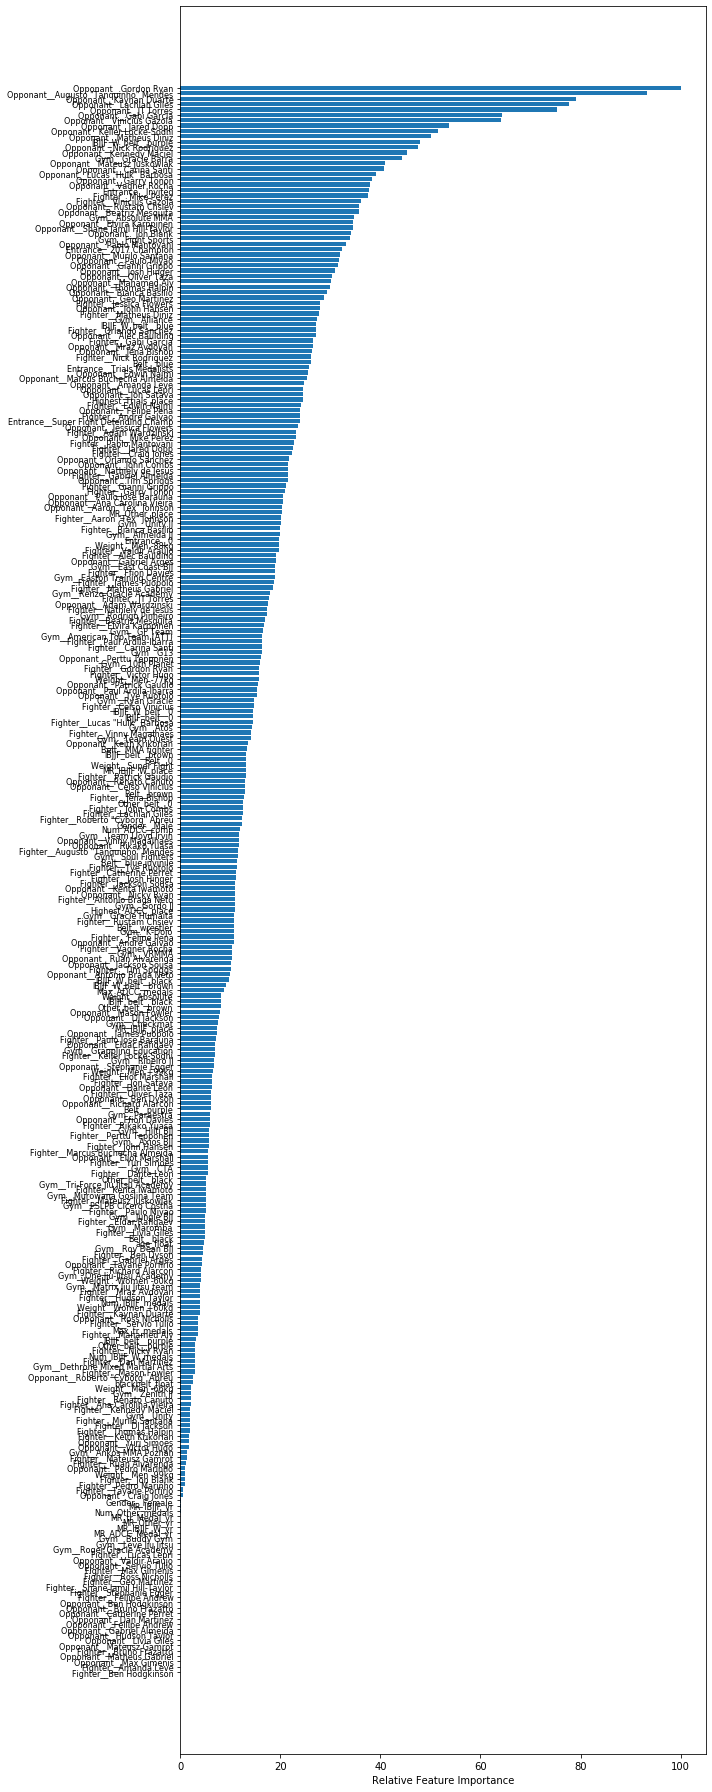

In [55]:
import matplotlib.pyplot as plt

feature_importance = abs(lr.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,25))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

<font color=  #3498db >

#### Decision Tree Classifier

In [137]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=10)

dt.fit(X_train,y_train)
dt_predict = dt.predict(X_test)
dt_predict_prob = dt.predict_proba(X_test)

dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_accuracy_score = accuracy_score(y_test, dt_predict)

print(dt_conf_matrix)
print(dt_accuracy_score)

[[15 13]
 [15 14]]
0.5087719298245614


<font color=  #3498db >

#### GaussianNB

In [138]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_predict = gnb.predict(X_test)
gnb_predict_prob = gnb.predict_proba(X_test)

gnb_conf_matrix = confusion_matrix(y_test, gnb_predict)
gnb_accuracy_score = accuracy_score(y_test, gnb_predict)

print(gnb_conf_matrix)
print(gnb_accuracy_score)

[[12 16]
 [ 9 20]]
0.5614035087719298


<font color=  #3498db >

#### N-Estimators for Random Forest Model

In [139]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [3, 10, 30, 50, 100], 'max_features': [2, 4, 6, 8]},
]

grid_search = GridSearchCV(clf, param_grid, cv=10, scoring='f1')

grid_search.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'ma

In [140]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 3}

<font color=  #3498db >

#### Feature Importance

In [144]:
feat_score=[]
for name, score in zip(X_train.columns, grid_search.best_estimator_.feature_importances_):
    feat_score.append([name, score])

In [145]:
feat_score.sort(reverse=True, key= lambda x:x[1])
for char in feat_score:
    print(char)

['age_float', 0.04737508422287202]
['blackbelt_float', 0.045013300884638195]
['Num_IBJJF_W_medals', 0.03626682168530549]
['Opponant__Gordon Ryan', 0.03381717727234492]
['MR_IBJJF_yr', 0.030625324235638435]
['Max_tr_medals', 0.02632078177360674]
['Weight__Absolute', 0.022353448670871]
['MR_ADCC_Medal_yr', 0.02211895453042463]
['Gender__Male', 0.02122705031781838]
['Opponant__Gabi Garcia', 0.018808570570304346]
['Max_ADCC_medals', 0.018604667122464055]
['Num_ADCC_comp', 0.01834375038066462]
['MR_tr_Medal_yr', 0.017877301723368443]
['Opponant__Augusto "Tanquinho" Mendes', 0.017090105237957915]
['Opponant__Garry Tonon', 0.016121195838724272]
['Belt__brown', 0.015644381625934626]
['MR_Other_place', 0.015254115323263527]
['Opponant__Matheus Diniz', 0.014080985366998588]
['Opponant__Aaron "Tex" Johnson', 0.014022668716193515]
['IBJJF_belt__black', 0.013840460957451372]
['MR_IBJJF_W_yr', 0.013217782621060282]
['MR_Other_yr', 0.011919763266032392]
['Fighter__Edwin Najmi', 0.011765327247769512]


Change f1 scoring to roc_auc

In [146]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [3, 10, 30, 50, 100], 'max_features': [2, 4, 6, 8]},
]

grid_search = GridSearchCV(clf, param_grid, cv=10, scoring='roc_auc')

grid_search.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'ma

In [147]:
grid_search.fit(X, y)
grid_search.best_params_

{'max_features': 8, 'n_estimators': 3}

In [148]:
feat_score=[]
for name, score in zip(X_train.columns, grid_search.best_estimator_.feature_importances_):
    feat_score.append([name, score])

In [149]:
feat_score.sort(reverse=True, key= lambda x:x[1])
for char in feat_score:
    print(char)

['age_float', 0.04737508422287202]
['blackbelt_float', 0.045013300884638195]
['Num_IBJJF_W_medals', 0.03626682168530549]
['Opponant__Gordon Ryan', 0.03381717727234492]
['MR_IBJJF_yr', 0.030625324235638435]
['Max_tr_medals', 0.02632078177360674]
['Weight__Absolute', 0.022353448670871]
['MR_ADCC_Medal_yr', 0.02211895453042463]
['Gender__Male', 0.02122705031781838]
['Opponant__Gabi Garcia', 0.018808570570304346]
['Max_ADCC_medals', 0.018604667122464055]
['Num_ADCC_comp', 0.01834375038066462]
['MR_tr_Medal_yr', 0.017877301723368443]
['Opponant__Augusto "Tanquinho" Mendes', 0.017090105237957915]
['Opponant__Garry Tonon', 0.016121195838724272]
['Belt__brown', 0.015644381625934626]
['MR_Other_place', 0.015254115323263527]
['Opponant__Matheus Diniz', 0.014080985366998588]
['Opponant__Aaron "Tex" Johnson', 0.014022668716193515]
['IBJJF_belt__black', 0.013840460957451372]
['MR_IBJJF_W_yr', 0.013217782621060282]
['MR_Other_yr', 0.011919763266032392]
['Fighter__Edwin Najmi', 0.011765327247769512]


<font color= #28b463>

#### Target 2: How Matches Concluded (Submission/Score/Referee Decision/Forfeit)

In [28]:
df.How.value_counts()

score           108
submission       70
ref decision     42
forfeit           6
Name: How, dtype: int64

In [150]:
#label encode the target column
from sklearn.preprocessing import LabelEncoder

target = ['How']

encoder = LabelEncoder()

# Apply the label encoder to each column
encoded_2 = df[target].apply(encoder.fit_transform)
encoded_2.head(3)

,How
0,1
1,3
2,2


In [151]:
y_2 = encoded_2
X_2 = data

In [152]:
display(X_2.shape)
display(y_2.shape)

(226, 296)

(226, 1)

In [153]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2,y_2, test_size=0.25,random_state=109)

In [154]:
print('Training X_train Shape:', X_2_train.shape)
print('Training y_train Shape:', y_2_train.shape)
print('Testing X_test Shape:', X_2_test.shape)
print('Testing y_test Shape:', y_2_test.shape)

Training X_train Shape: (169, 296)
Training y_train Shape: (169, 1)
Testing X_test Shape: (57, 296)
Testing y_test Shape: (57, 1)


<font color=  #3498db >

#### Random Forest

In [155]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)

clf.fit(X_2_train, y_2_train)

predicted= clf.predict(X_2_test) 

In [156]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_2_test, predicted))

Accuracy: 0.3684210526315789


In [157]:
print(metrics.classification_report(y_2_test, predicted))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.12      0.09      0.11        11
           2       0.35      0.57      0.44        21
           3       0.53      0.35      0.42        23

    accuracy                           0.37        57
   macro avg       0.25      0.25      0.24        57
weighted avg       0.37      0.37      0.35        57



In [158]:
#cross validating 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score

y_2_pred_cv = cross_val_predict(clf, X_2_test, y_2_test, cv=5)

confusion_matrix(y_2_pred_cv, y_2_test)

array([[ 0,  0,  0,  0],
       [ 0,  0,  1,  1],
       [ 2,  6, 12,  3],
       [ 0,  5,  8, 19]], dtype=int64)

In [159]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(clf, X_2_train, y_2_train, cv = 30)
print(cv_score)
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_score.mean(), cv_score.std() * 2))

[0.375      0.28571429 0.28571429 0.57142857 0.66666667 0.33333333
 0.5        0.33333333 0.5        0.16666667 0.66666667 0.5
 1.         0.33333333 0.83333333 0.33333333 0.5        0.8
 0.2        0.4        0.8        0.6        0.4        1.
 0.4        0.4        0.6        0.5        0.5        0.75      ]
Accuracy: 0.52 (+/- 0.43)


In [160]:
#Let's test the entire dataset again.
scores = cross_val_score(clf, X_2, y_2, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.49 (+/- 0.30)


<font color=  #3498db >

#### Logistic Regression

In [161]:
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2,y_2, test_size=0.25,random_state=109) # 60% training and 40% test

print('Training X_train Shape:', X_2_train.shape)
print('Training y_train Shape:', y_2_train.shape)
print('Testing X_test Shape:', X_2_test.shape)
print('Testing y_test Shape:', y_2_test.shape)

Training X_train Shape: (169, 296)
Training y_train Shape: (169, 1)
Testing X_test Shape: (57, 296)
Testing y_test Shape: (57, 1)


In [162]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_2_train, y_2_train)
lr_predict =lr.predict(X_2_test)

lr_predict_prob = lr.predict_proba(X_2_test)

In [163]:
from sklearn.metrics import confusion_matrix, accuracy_score
lr_conf_matrix = confusion_matrix(y_2_test, lr_predict)
lr_accuracy = accuracy_score(y_2_test, lr_predict)

print(lr_conf_matrix)
print(lr_accuracy)

metrics.f1_score(y_2_test, lr_predict, average='micro') 

[[ 0  1  1  0]
 [ 0  0 10  1]
 [ 0  4 12  5]
 [ 0  2 11 10]]
0.38596491228070173


0.38596491228070173

<font color=  #3498db >

#### Decision Tree Classifier

In [164]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=10)

dt.fit(X_2_train,y_2_train)
dt_predict = dt.predict(X_2_test)
dt_predict_prob = dt.predict_proba(X_2_test)

dt_conf_matrix = confusion_matrix(y_2_test, dt_predict)
dt_accuracy_score = accuracy_score(y_2_test, dt_predict)

print(dt_conf_matrix)
print(dt_accuracy_score)

[[ 0  1  1  0]
 [ 0  1  9  1]
 [ 0  9  8  4]
 [ 0  3 14  6]]
0.2631578947368421


<font color=  #3498db >

#### GaussianNB

In [165]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_2_train, y_2_train)
gnb_predict = gnb.predict(X_2_test)
gnb_predict_prob = gnb.predict_proba(X_2_test)

gnb_conf_matrix = confusion_matrix(y_2_test, gnb_predict)
gnb_accuracy_score = accuracy_score(y_2_test, gnb_predict)

print(gnb_conf_matrix)
print(gnb_accuracy_score)

[[ 0  1  1  0]
 [ 0  2  6  3]
 [ 2  7  2 10]
 [ 1  3 10  9]]
0.22807017543859648


<font color=  #3498db >

#### LightGBM

In [48]:
df2 = df[['Results', #for prediction
          'Gender','Weight','Fighter','Opponant','Entrance','Gym', #match entrace data
          'Belt','age_float','blackbelt_float', #fighter info
          'Num_ADCC_comp','Highest_ADCC_place','Max_ADCC_medals','MR_ADCC_Medal_yr','Highest_Trials_place',
          'Max_tr_medals','MR_tr_Medal_yr',
          #'IBJJF_world', 'IBJJF_majors','Other_tours', 
          'MR_IBJJF_W_yr', 'IBJJF_W_belt', 'Num_IBJJF_W_medals','MR_IBJJF_W_place', 'MR_IBJJF_yr', 'IBJJF_belt', 
          'Num_IBJJF_medals','MR_IBJJF_place', 'MR_Other_yr', 'Other_belt', 'Num_Other_medals','MR_Other_place'
         ]]

In [49]:
df2.fillna(0, inplace=True)

In [50]:
df2.Num_ADCC_comp= df2.Num_ADCC_comp.astype(int)
df2.Highest_ADCC_place= df2.Highest_ADCC_place.astype(int)
df2.Max_ADCC_medals= df2.Max_ADCC_medals.astype(int)
df2.MR_ADCC_Medal_yr= df2.MR_ADCC_Medal_yr.astype(int)
df2.Highest_Trials_place= df2.Highest_Trials_place.astype(int)
df2.Max_tr_medals= df2.Max_tr_medals.astype(int)
df2.MR_tr_Medal_yr= df2.MR_tr_Medal_yr.astype(int)

df2.MR_IBJJF_W_yr= df2.MR_IBJJF_W_yr.astype(int)
df2.Num_IBJJF_W_medals= df2.Num_IBJJF_W_medals.astype(int)
df2.MR_IBJJF_W_place= df2.MR_IBJJF_W_place.astype(int)

df2.MR_IBJJF_yr= df2.MR_IBJJF_yr.astype(int)
df2.Num_IBJJF_medals= df2.Num_IBJJF_medals.astype(int)
df2.MR_IBJJF_place= df2.MR_IBJJF_place.astype(int)
df2.MR_Other_yr= df2.MR_Other_yr.astype(int)
df2.Num_Other_medals= df2.Num_Other_medals.astype(int)
df2.MR_Other_place= df2.MR_Other_place.astype(int)

df2.age_float= df2.age_float.astype(int)
df2.blackbelt_float= df2.blackbelt_float.astype(int)

df2.Gym= df2.Gym.astype(str)
df2.Belt= df2.Belt.astype(str)
df2.Entrance= df2.Entrance.astype(str)
df2.IBJJF_W_belt= df2.IBJJF_W_belt.astype(str)
df2.IBJJF_belt= df2.IBJJF_belt.astype(str)
df2.Other_belt= df2.Other_belt.astype(str)

In [51]:
#label encode the target column
from sklearn.preprocessing import LabelEncoder

target = ['Results']

encoder = LabelEncoder()

# Apply the label encoder to each column
encoded = df2[target].apply(encoder.fit_transform)
encoded.head(3)

,Results
0,0
1,1
2,1


In [52]:
# segment categorical features

cat_features = ['Gender','Weight','Fighter','Opponant',
       'Entrance','Gym','Belt','IBJJF_W_belt', 'IBJJF_belt','Other_belt',
               ]

In [53]:
#ohe with pandas get_dummies for categorical features, drop the target
df2.drop(columns=['Results'], inplace=True)
data = pd.get_dummies(df2,prefix_sep="__",
                              columns=cat_features)

data.head()

,age_float,blackbelt_float,Num_ADCC_comp,Highest_ADCC_place,Max_ADCC_medals,MR_ADCC_Medal_yr,Highest_Trials_place,Max_tr_medals,MR_tr_Medal_yr,MR_IBJJF_W_yr,...,IBJJF_W_belt__brown,IBJJF_W_belt__purple,IBJJF_belt__0,IBJJF_belt__black,IBJJF_belt__brown,IBJJF_belt__purple,Other_belt__0,Other_belt__black,Other_belt__brown,Other_belt__purple
0,28,6,1,3,1,2019,0,0,0,2019,...,0,0,0,1,0,0,0,1,0,0
1,28,6,4,0,0,2019,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,37,6,1,0,0,2019,1,1,2019,0,...,0,0,0,1,0,0,0,1,0,0
3,27,4,1,0,0,2019,0,0,0,2018,...,0,0,0,1,0,0,0,1,0,0
4,29,9,3,1,4,2017,0,0,0,2019,...,0,0,0,1,0,0,0,1,0,0


<font color=  #3498db >

Train / Test Split with GridSearchCV

In [54]:
y = encoded 
X = data

In [55]:
display(X.shape)
display(y.shape)

(226, 296)

(226, 1)

In [56]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=109)

print('Training X_train Shape:', X_train.shape)
print('Training y_train Shape:', y_train.shape)
print('Testing X_test Shape:', X_test.shape)
print('Testing y_test Shape:', y_test.shape)

Training X_train Shape: (169, 296)
Training y_train Shape: (169, 1)
Testing X_test Shape: (57, 296)
Testing y_test Shape: (57, 1)


In [ ]:
import lightgbm as lgb
from sklearn.metrics import auc, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

estimator = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', 
                        n_estimators = 20, num_leaves = 38)


param_grid = {
    'n_estimators': [x for x in range(24,40,2)],
    'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}
gridsearch = GridSearchCV(estimator, param_grid)

gridsearch.fit(X_train, y_train,
        eval_set = [(X_test, y_test)],
        eval_metric = ['auc', 'binary_logloss'],
        early_stopping_rounds = 5)

In [59]:
gbm = lgb.LGBMClassifier(learning_rate = 0.15, metric = 'l1', 
                        n_estimators = 24)


gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=['auc', 'binary_logloss'],
early_stopping_rounds=5)

[1]	valid_0's auc: 0.583128	valid_0's binary_logloss: 0.687776	valid_0's l1: 0.496311
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.553571	valid_0's binary_logloss: 0.688686	valid_0's l1: 0.494523
[3]	valid_0's auc: 0.561576	valid_0's binary_logloss: 0.688714	valid_0's l1: 0.491568
[4]	valid_0's auc: 0.571429	valid_0's binary_logloss: 0.686527	valid_0's l1: 0.489243
[5]	valid_0's auc: 0.578818	valid_0's binary_logloss: 0.684953	valid_0's l1: 0.486661
[6]	valid_0's auc: 0.568966	valid_0's binary_logloss: 0.689883	valid_0's l1: 0.486121
Early stopping, best iteration is:
[1]	valid_0's auc: 0.583128	valid_0's binary_logloss: 0.687776	valid_0's l1: 0.496311


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.15, max_depth=-1,
               metric='l1', min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=24, n_jobs=-1, num_leaves=31,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

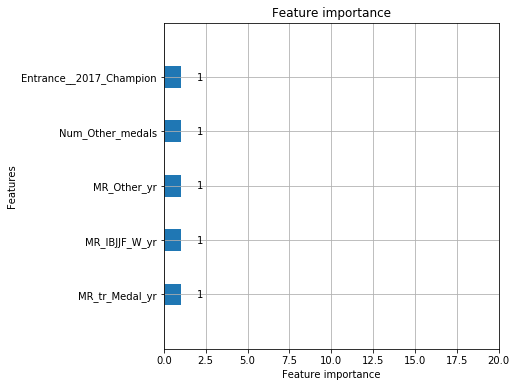

In [65]:
import matplotlib.pyplot as plt
ax = lgb.plot_importance(gbm, height = 0.4, 
#                          max_num_features = 25, 
                         xlim = (0,20), 
#                          ylim = (0,23), 
                         figsize = (6,6))
plt.show()

In [67]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
print('The accuracy of prediction is:', accuracy_score(y_test, y_pred))
print('The roc_auc_score of prediction is:', roc_auc_score(y_test, y_pred))
# print('The null acccuracy is:', max(y_test.mean(), 1 - y_test.mean()))

The accuracy of prediction is: 0.543859649122807
The roc_auc_score of prediction is: 0.5437192118226601


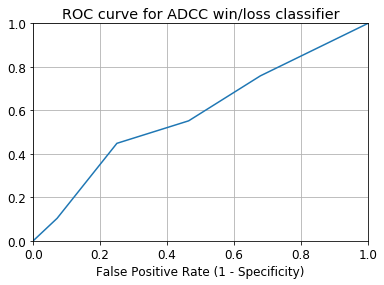

In [70]:
y_pred_prob = gbm.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for ADCC win/loss classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.grid(True)

In [71]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred))

[[15 13]
 [13 16]]


<font color=  #3498db >

Train / Test / Validation 

In [37]:
data.fillna(0, inplace=True)

In [38]:
#add target encoded to all data ohe
data_1 = data.join(encoded)

In [39]:
data_1.head(3)

,age_float,blackbelt_float,Num_ADCC_comp,Highest_ADCC_place,Max_ADCC_medals,MR_ADCC_Medal_yr,Highest_Trials_place,Max_tr_medals,MR_tr_Medal_yr,MR_IBJJF_W_yr,...,IBJJF_W_belt__purple,IBJJF_belt__0,IBJJF_belt__black,IBJJF_belt__brown,IBJJF_belt__purple,Other_belt__0,Other_belt__black,Other_belt__brown,Other_belt__purple,Results
0,28,6,1,3,1,2019,0,0,0,2019,...,0,0,1,0,0,0,1,0,0,0
1,28,6,4,0,0,2019,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
2,37,6,1,0,0,2019,1,1,2019,0,...,0,0,1,0,0,0,1,0,0,1


In [40]:
# baseline model
valid_fraction = 0.1
valid_size = int(len(data_1) * valid_fraction)

train = data_1[:-2 * valid_size]
valid = data_1[-2 * valid_size:-valid_size]
test = data_1[-valid_size:]

In [41]:
from sklearn import metrics
for each in [train, valid, test]:
    print(f"Result fraction = {each.Results.mean():.4f}")

Result fraction = 0.5330
Result fraction = 0.4545
Result fraction = 0.2727


In [42]:
import lightgbm as lgb

feature_cols = train.columns.drop('Results')

dtrain = lgb.Dataset(train[feature_cols], label=train['Results'])
dvalid = lgb.Dataset(valid[feature_cols], label=valid['Results'])

param = {'num_leaves': 64, 'objective': 'binary'}
param['metric'] = 'auc'
num_round = 1000
bst = lgb.train(param, dtrain, num_round, valid_sets=[dvalid], early_stopping_rounds=10, verbose_eval=False)

In [43]:
from sklearn import metrics
ypred = bst.predict(test[feature_cols])
score = metrics.roc_auc_score(test['Results'], ypred)

print(f"Test AUC score: {score}")

Test AUC score: 0.40625


<font color=  #3498db >

#### Categorical Encodings 

Here the model will learn on the validation data.

In [44]:
import lightgbm as lgb
from sklearn import metrics

def get_data_splits(dataframe, valid_fraction=0.1):
    valid_fraction = 0.1
    valid_size = int(len(dataframe) * valid_fraction)

    train = dataframe[:-valid_size * 2]
    # valid size == test size, last two sections of the data
    valid = dataframe[-valid_size * 2:-valid_size]
    test = dataframe[-valid_size:]
    
    return train, valid, test

def train_model(train, valid):
    feature_cols = train.columns.drop('Results')

    dtrain = lgb.Dataset(train[feature_cols], label=train['Results'])
    dvalid = lgb.Dataset(valid[feature_cols], label=valid['Results'])

    param = {'num_leaves': 64, 'objective': 'binary', 
             'metric': 'auc', }
    print("Training model!")
    bst = lgb.train(param, dtrain, num_boost_round=1000, valid_sets=[dvalid], 
                    early_stopping_rounds=10, verbose_eval=False)

    valid_pred = bst.predict(valid[feature_cols])
    valid_score = metrics.roc_auc_score(valid['Results'], valid_pred)
    print(f"Validation AUC score: {valid_score:.4f}") 
    return bst

In [45]:
# Training a model on the baseline data
train, valid, _ = get_data_splits(data_1)

bst = train_model(train, valid)

Training model!
Validation AUC score: 0.8167


<font color=  #3498db >

Tune Hyperparameters

In [46]:
import lightgbm as lgb
from sklearn import metrics

def get_data_splits(dataframe, valid_fraction=0.1):
    valid_fraction = 0.1
    valid_size = int(len(dataframe) * valid_fraction)

    train = dataframe[:-valid_size * 2]
    # valid size == test size, last two sections of the data
    valid = dataframe[-valid_size * 2:-valid_size]
    test = dataframe[-valid_size:]
    
    return train, valid, test

def train_model(train, valid):
    feature_cols = train.columns.drop('Results')

    dtrain = lgb.Dataset(train[feature_cols], label=train['Results'])
    dvalid = lgb.Dataset(valid[feature_cols], label=valid['Results'])

    param = {'num_leaves': 10, 'objective': 'binary', 'learning_rate': 2, 'max_depth': 10, 'feature_fraction':1,
             'metric': 'auc', 'seed': 7, 'min_data':20 } #'boosting_type': 'gbdt', 'sub_features': 0.5,
            # lowering num leaves loweres the score
            # learning rate 2 had the max and raised score from 81 to 85
            # changing seed didn't change the score
            # added/removing boosting type and sub features didn't change anything
    print("Training model!")
    bst = lgb.train(param, dtrain, num_boost_round=1000, valid_sets=[dvalid], 
                    early_stopping_rounds=10, verbose_eval=False)

    valid_pred = bst.predict(valid[feature_cols])
    valid_score = metrics.roc_auc_score(valid['Results'], valid_pred)
    print(f"Validation AUC score: {valid_score:.4f}")
    return bst

In [47]:
# Training a model on the baseline data
train, valid, _ = get_data_splits(data_1)

bst = train_model(train, valid)

Training model!
Validation AUC score: 0.8500


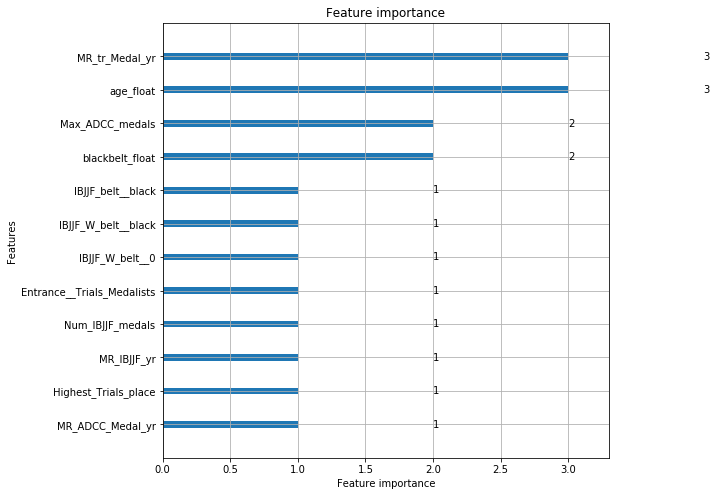

In [190]:
_ = lgb.plot_importance(bst, figsize=(8,8))

<font color=  #3498db >
Count Encoding

Count encoding replaces each categorical value with the number of times it appears in the dataset.

In [210]:
#label encode the target column
from sklearn.preprocessing import LabelEncoder

target = ['Results']

encoder = LabelEncoder()

# Apply the label encoder to each column
encoded = df2[target].apply(encoder.fit_transform)
encoded.head(3)

,Results
0,0
1,1
2,1


In [211]:
# segment categorical features

cat_features = ['Gender','Weight','Fighter','Opponant',
       'Entrance','Gym','Belt','IBJJF_W_belt', 'IBJJF_belt','Other_belt',
               ]

In [212]:
import category_encoders as ce
count_enc = ce.CountEncoder()
count_encoded = count_enc.fit_transform(df2[cat_features])

data_cols = ['age_float', 'blackbelt_float',
       'Num_ADCC_comp', 'Highest_ADCC_place', 'Max_ADCC_medals',
       'MR_ADCC_Medal_yr', 'Highest_Trials_place', 'Max_tr_medals',
       'MR_tr_Medal_yr', 'MR_IBJJF_W_yr', 'Num_IBJJF_W_medals',
       'MR_IBJJF_W_place', 'MR_IBJJF_yr', 'Num_IBJJF_medals',
       'MR_IBJJF_place', 'MR_Other_yr', 'Num_Other_medals',
       'MR_Other_place']

data_2 = df2[data_cols].join(count_encoded.add_suffix("_count"))

In [213]:
#add target encoded to all data ohe
data_2 = data_2.join(encoded)

In [214]:
data_2.head(3)

,age_float,blackbelt_float,Num_ADCC_comp,Highest_ADCC_place,Max_ADCC_medals,MR_ADCC_Medal_yr,Highest_Trials_place,Max_tr_medals,MR_tr_Medal_yr,MR_IBJJF_W_yr,...,Weight_count,Fighter_count,Opponant_count,Entrance_count,Gym_count,Belt_count,IBJJF_W_belt_count,IBJJF_belt_count,Other_belt_count,Results
0,28,6,1,3,1,2019,0,0,0,2019,...,32,4,4,139,4,197,89,151,146,0
1,28,6,4,0,0,2019,0,0,0,0,...,32,6,4,139,21,197,93,151,146,1
2,37,5,1,0,0,2019,1,1,2019,0,...,32,4,5,52,27,197,93,151,146,1


In [215]:
# Training a model on the baseline data
train, valid, test = get_data_splits(data_2)
bst = train_model(train, valid)

Training model!
Validation AUC score: 0.8167


<font color=  #3498db >
Target Encoding

Target encoding replaces a categorical value with the average value of the target for that value of the feature. This is often blended with the target probability over the entire dataset to reduce the variance of values with few occurences.

This technique uses the targets to create new features. So including the validation or test data in the target encodings would be a form of target leakage. Instead, you should learn the target encodings from the training dataset only and apply it to the other datasets.

In [214]:
import category_encoders as ce
cat_features = ['Results', 'Gender', 'Weight', 'Fighter', 'Opponant',
       'Entrance', 'Gym', 'Belt','IBJJF_W_belt', 'IBJJF_belt','Other_belt',
               ]

# Create the encoder itself
target_enc = ce.TargetEncoder(cols=cat_features)

train, valid, _ = get_data_splits(data_2)

# Fit the encoder using the categorical features and target
target_enc.fit(train[cat_features], train['Results'])

# Transform the features, rename the columns with _target suffix, and join to dataframe
train = train.join(target_enc.transform(train[cat_features]).add_suffix('_target'))
valid = valid.join(target_enc.transform(valid[cat_features]).add_suffix('_target'))

train.head()
bst = train_model(train, valid)

Training model!
Validation AUC score: 1.0000


<font color=  #3498db >
CatBoost Encoding

This is similar to target encoding in that it's based on the target probablity for a given value. However with CatBoost, for each row, the target probability is calculated only from the rows before it.

In [216]:
cat_features = ['Results', 'Gender', 'Weight', 'Fighter', 'Opponant',
       'Entrance', 'Gym', 'Belt','IBJJF_W_belt', 'IBJJF_belt','Other_belt',
               ]
target_enc = ce.CatBoostEncoder(cols=cat_features)

train, valid, _ = get_data_splits(data_2)
target_enc.fit(train[cat_features], train['Results'])

train = train.join(target_enc.transform(train[cat_features]).add_suffix('_cb'))
valid = valid.join(target_enc.transform(valid[cat_features]).add_suffix('_cb'))

bst = train_model(train, valid)

Training model!
Validation AUC score: 1.0000


Count, Target, and CatBoost encoding work too well on the small dataset and the perfect score of 1.0 is misleading. Data leakage has occurred and we should expand the dataset with the player data.

<font color=  #3498db >

#### Data Leakage!

Stick with one-hot encoding for categories.

<font color= #28b463>
    
### Feature Engeineering

<font color=  #3498db >

#### Feature Generation

In [217]:
df4 = df[['Results',#'Points','How', #for prediction
          'Gender','Weight','Fighter','Opponant','Entrance','Gym', #match entrace data
          'Belt','age_float','blackbelt_float', #fighter info
          'Num_ADCC_comp','Highest_ADCC_place','Max_ADCC_medals','MR_ADCC_Medal_yr','Highest_Trials_place',
          'Max_tr_medals','MR_tr_Medal_yr',
          #'IBJJF_world', 'IBJJF_majors','Other_tours', 
          'MR_IBJJF_W_yr', 'IBJJF_W_belt', 'Num_IBJJF_W_medals','MR_IBJJF_W_place', 'MR_IBJJF_yr', 'IBJJF_belt', 
          'Num_IBJJF_medals','MR_IBJJF_place', 'MR_Other_yr', 'Other_belt', 'Num_Other_medals','MR_Other_place'
         ]]

In [218]:
df4.fillna(0, inplace=True)

In [219]:
df4.Num_ADCC_comp= df4.Num_ADCC_comp.astype(int)
df4.Highest_ADCC_place= df4.Highest_ADCC_place.astype(int)
df4.Max_ADCC_medals= df4.Max_ADCC_medals.astype(int)
df4.MR_ADCC_Medal_yr= df4.MR_ADCC_Medal_yr.astype(int)
df4.Highest_Trials_place= df4.Highest_Trials_place.astype(int)
df4.Max_tr_medals= df4.Max_tr_medals.astype(int)
df4.MR_tr_Medal_yr= df4.MR_tr_Medal_yr.astype(int)

df4.MR_IBJJF_W_yr= df4.MR_IBJJF_W_yr.astype(int)
df4.Num_IBJJF_W_medals= df4.Num_IBJJF_W_medals.astype(int)
df4.MR_IBJJF_W_place= df4.MR_IBJJF_W_place.astype(int)

df4.MR_IBJJF_yr= df4.MR_IBJJF_yr.astype(int)
df4.Num_IBJJF_medals= df4.Num_IBJJF_medals.astype(int)
df4.MR_IBJJF_place= df4.MR_IBJJF_place.astype(int)
df4.MR_Other_yr= df4.MR_Other_yr.astype(int)
df4.Num_Other_medals= df4.Num_Other_medals.astype(int)
df4.MR_Other_place= df4.MR_Other_place.astype(int)

df4.age_float= df4.age_float.astype(int)
df4.blackbelt_float= df4.blackbelt_float.astype(int)

df4.Gym= df4.Gym.astype(str)
df4.Belt= df4.Belt.astype(str)
df4.Entrance= df4.Entrance.astype(str)
df4.IBJJF_W_belt= df4.IBJJF_W_belt.astype(str)
df4.IBJJF_belt= df4.IBJJF_belt.astype(str)
df4.Other_belt= df4.Other_belt.astype(str)

Feature Generration:
Create interactions by combining features into one.

In [264]:
df4['Entrance_Gym'] = df4['Entrance'] + "_" + df4['Gym']
df4['Gender_Weight'] = df4['Gender'] + "_" + df4['Weight']
df4['Fighter_Belt'] = df4['Fighter'] + "_" + df4['Belt']

Transform numerical features.

Text(0.5, 1.0, 'Experience as Black Belt')

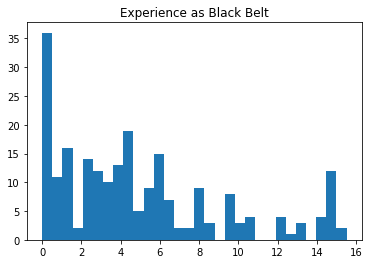

In [265]:
import matplotlib.pyplot as plt
plt.hist(df.blackbelt_float, bins=30);
plt.title('Experience as Black Belt')

Text(0.5, 1.0, 'Square root - Experience as Black Belt')

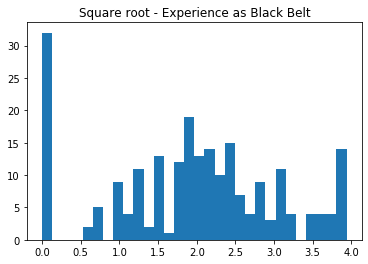

In [266]:
import numpy as np
plt.hist(np.sqrt(df.blackbelt_float), bins=30);
plt.title('Square root - Experience as Black Belt')

In [ ]:
plt.hist(np.log(df.blackbelt_float), bins=30);
plt.title('Natural Log - Experience as Black Belt')

Feature Selection: Drop unrealted features from dataset to reduce dimentionality.

In [117]:
df4.fillna(0, inplace=True)

In [118]:
df4.Num_ADCC_comp= df4.Num_ADCC_comp.astype(int)
df4.Highest_ADCC_place= df4.Highest_ADCC_place.astype(int)
df4.Max_ADCC_medals= df4.Max_ADCC_medals.astype(int)
df4.MR_ADCC_Medal_yr= df4.MR_ADCC_Medal_yr.astype(int)
df4.Highest_Trials_place= df4.Highest_Trials_place.astype(int)
df4.Max_tr_medals= df4.Max_tr_medals.astype(int)
df4.MR_tr_Medal_yr= df4.MR_tr_Medal_yr.astype(int)

df4.MR_IBJJF_W_yr= df4.MR_IBJJF_W_yr.astype(int)
df4.Num_IBJJF_W_medals= df4.Num_IBJJF_W_medals.astype(int)
df4.MR_IBJJF_W_place= df4.MR_IBJJF_W_place.astype(int)

df4.MR_IBJJF_yr= df4.MR_IBJJF_yr.astype(int)
df4.Num_IBJJF_medals= df4.Num_IBJJF_medals.astype(int)
df4.MR_IBJJF_place= df4.MR_IBJJF_place.astype(int)
df4.MR_Other_yr= df4.MR_Other_yr.astype(int)
df4.Num_Other_medals= df4.Num_Other_medals.astype(int)
df4.MR_Other_place= df4.MR_Other_place.astype(int)

df4.age_float= df4.age_float.astype(int)
df4.blackbelt_float= df4.blackbelt_float.astype(int)

df4.Gym= df4.Gym.astype(str)
df4.Belt= df4.Belt.astype(str)
df4.Entrance= df4.Entrance.astype(str)
df4.IBJJF_W_belt= df4.IBJJF_W_belt.astype(str)
df4.IBJJF_belt= df4.IBJJF_belt.astype(str)
df4.Other_belt= df4.Other_belt.astype(str)

In [119]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

#encode all column features into array
for col in df4.columns:
    df4[col]=le.fit_transform(df4[col])  

In [120]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(df4))

StandardScaler(copy=True, with_mean=True, with_std=True)


Correlation Coefficients

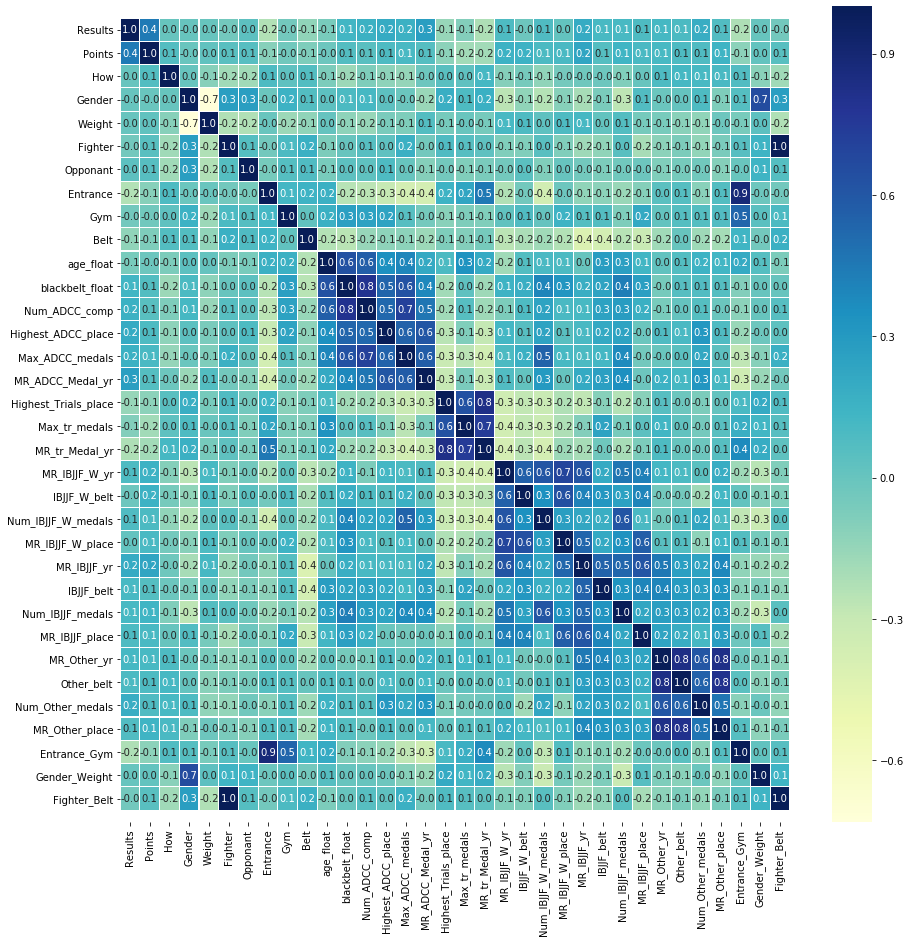

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
f,ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(df4.corr(),annot=True, linewidths=.1, fmt='.1f', ax=ax,cmap="YlGnBu")

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
# plt.show() 

plt.show()
# f.savefig('Numerical Corr Heat Map 2.png',bbox_inches='tight')

In [122]:
df4[df4.columns[0:]].corr(method ='pearson')['Results'][:]

Results                 1.000000e+00
Points                  4.482282e-01
How                     0.000000e+00
Gender                 -2.818152e-18
Weight                  8.292176e-18
Fighter                -3.509881e-02
Opponant                3.509881e-02
Entrance               -2.324823e-01
Gym                    -3.921955e-02
Belt                   -1.297882e-01
age_float              -6.097065e-02
blackbelt_float         1.285570e-01
Num_ADCC_comp           1.644195e-01
Highest_ADCC_place      2.002459e-01
Max_ADCC_medals         1.657761e-01
MR_ADCC_Medal_yr        2.733262e-01
Highest_Trials_place   -1.492479e-01
Max_tr_medals          -9.363830e-02
MR_tr_Medal_yr         -2.167449e-01
MR_IBJJF_W_yr           9.279679e-02
IBJJF_W_belt           -1.977211e-02
Num_IBJJF_W_medals      8.570438e-02
MR_IBJJF_W_place        1.843886e-02
MR_IBJJF_yr             2.020309e-01
IBJJF_belt              1.129002e-01
Num_IBJJF_medals        1.082086e-01
MR_IBJJF_place          9.187022e-02
M